## 画出在notebook下的文件夹中的价格曲线； 只取一条画

### 画图代码复用curve_metric 中的第一步

In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [2]:
# 首先查看索要用的文件夹
print([_ for _ in os.listdir() if os.path.isdir(_)])

['.ipynb_checkpoints', 'ARIMA', 'ARIMAX', 'BNN', 'CNN', 'LSTM', 'MLP', 'Naive', 'Rerun-WT-TCN-MaskMultiHeadAtt', 'Seq2Seq', 'TCN', 'Trash', 'WT-LSTM', 'WT-TCN', 'WT-TCN-MaskMultiHeadAtt', 'WT-TCN-MaskMultiHeadAtt-Nhead', 'WT-TCN-MaskMultiHeadAtt-NoMask']


In [ ]:
print(os.getcwd())
# 存放下面语句打印出的目录， 便于后续使用
print([_ for _ in os.listdir() if os.path.isdir(_)])
dir_paths = ['.ipynb_checkpoints', 'ARIMA', 'ARIMAX', 'BNN', 'CNN', 'LSTM', 'MLP',
             'Naive', 'Seq2Seq', 'TCN', 'WT-LSTM', 'WT-TCN',
             'WT-TCN-MaskMultiHeadAtt']
# dir_paths = ['WT-TCN-Attention-BETA', 'WT-TCN-Attention']
# 暂时只取第一个， 之后的直接循环
# dir_paths = dir_paths[1:3]
subdir_path = []
for dir_path in dir_paths:
    if '之前写过' in dir_path:
        continue
    _path = [dir_path+'/'+dir for dir in os.listdir(dir_path) if
                   os.path.isdir(dir_path+'\\'+dir) and
                   'ipynb_checkpoints' not in dir and
                  '__pycache__' not in dir]
    subdir_path.extend(_path)
subdir_path

In [4]:
def get_alg_curve(subdir_path):
    '''这只能得出单个模型在不同特征和时间下的预测和真实曲线信息, 计算出的df，index为特征的num， columns为预测日期'''
    test_date = ['2017-10-26', '2017-11-24', '2018-04-11'] + \
                ['2017-10-30', '2018-04-29', '2018-07-22'] + \
                ['2017-12-27', '2018-02-02', '2018-03-10'] + \
                ['2018-03-05', '2018-01-07', '2018-08-01'] + \
                ['2017-06-15', '2017-08-13', '2018-09-21']
#     test_date_null_list = [[] for i in range(len(test_date))]
#     # 存放每次predicti的数据
#     predict_set = dict(zip(test_date, test_date_null_list))
#     # 存放那个点真实的y值
#     y_set = dict(zip(test_date, test_date_null_list))
#     predict_y_set = [y_set, predict_set]
    all_save_in_df = pd.DataFrame(data=np.zeros((len(subdir_path), len(test_date))),
                                  index=subdir_path, 
                                  columns=test_date )
    for subdir in subdir_path:
#         datadir_path = [subdir+'/'+dir for dir in os.listdir(subdir) if os.path.isdir(subdir+'/'+dir)]
        for data in os.listdir(subdir):
#             if data != '2018-03-05':  #这里设置所要提取的日期
#                 continue
            temp_pred_y_save_in_dict = {'test_y':[], 'test_predict':[]}
            datadir = subdir+'/'+data
#             print(datadir)
            with open(datadir+'/'+'logger.log') as f:
                for line in f:
                    if 'test_predict' in line:
                        
                        test_predict = line
                        while ']' not in test_predict:
                            test_predict1 = f.readline()
                            test_predict = test_predict + test_predict1
                        
                        
#                         test_predict1 = line
#                         test_predict2 = f.readline()
#                         test_predict = test_predict1 + test_predict2
#                         if ']' not in test_predict2:
#                             test_predict3 = f.readline()
#                             test_predict += test_predict3
                        test_predict = [float(i) for i in re.findall(r'[\d]+\.[\d]*', test_predict)]
#                         assert len(test_predict) == 14
        
                        test_y = f.readline()
                        while ']' not in test_y:
                            test_y1 = f.readline()
                            test_y = test_y + test_y1
                            
                            
#                         test_y2 = f.readline()
#                         test_y = test_y1 + test_y2
#                         if ']' not in test_y2:
#                             test_y3 = f.readline()
#                             test_y += test_y3
                        test_y = [float(i) for i in re.findall(r'[\d]+\.[\d]*', test_y)]
#                         assert len(test_y) == 14
#                         print('test_predict:', test_predict)
#                         print('test_y:', test_y)
#                         print('\n')
                        temp_pred_y_save_in_dict['test_y'].append(test_y)
                        temp_pred_y_save_in_dict['test_predict'].append(test_predict)
            all_save_in_df.loc[subdir, data] = str(temp_pred_y_save_in_dict)
    return all_save_in_df

In [5]:
one_model_result = get_alg_curve(subdir_path)
one_model_result

,2017-10-26,2017-11-24,2018-04-11,2017-10-30,2018-04-29,2018-07-22,2017-12-27,2018-02-02,2018-03-10,2018-03-05,2018-01-07,2018-08-01,2017-06-15,2017-08-13,2018-09-21
ARIMA/arima-result,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
ARIMAX/arimax-result119,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
BNN/bnn-result119,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
CNN/cnn-result119,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
LSTM/lstm-result-1e-05-0.5-16-119,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6,

In [6]:
# 处理下index的值
idx = one_model_result.index
idx = [name.split('/')[0] for name in idx]
idx[idx.index('WT-TCN-MaskMultiHeadAtt')] = 'WT-CATCN'
one_model_result.index = idx
one_model_result

,2017-10-26,2017-11-24,2018-04-11,2017-10-30,2018-04-29,2018-07-22,2017-12-27,2018-02-02,2018-03-10,2018-03-05,2018-01-07,2018-08-01,2017-06-15,2017-08-13,2018-09-21
ARIMA,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
ARIMAX,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
BNN,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
CNN,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': [[4062.6, 4327.9, 4161.7, 4387.4, 4...","{'test_y': [[6766.7, 6729.6, 6704.1, 6584.1, 6..."
LSTM,"{'test_y': [[5887.6, 5764.6, 5726.6, 6147.5, 6...","{'test_y': [[8200.8, 8754.7, 9318.4, 9733.2, 9...","{'test_y': [[6962.1, 7926.6, 7887.4, 8004.4, 8...","{'test_y': [[6124.3, 6451.2, 6737.8, 7024.8, 7...","{'test_y': [[9415.1, 9245.1, 9074.9, 9243.2, 9...","{'test_y': [[7412.3, 7723.0, 8407.0, 8173.7, 7...","{'test_y': [[15416.6, 14398.7, 14392.6, 12531....","{'test_y': [[8893.2, 9241.1, 8222.2, 6938.5, 7...","{'test_y': [[8762.0, 9529.6, 9137.4, 9154.9, 8...","{'test_y': [[11330.6, 10675.1, 9902.9, 9300.0,...","{'test_y': [[16228.2, 14976.2, 14778.5, 15043....","{'test_y': [[7606.4, 7535.6, 7419.0, 7014.3, 7...","{'test_y': [[2442.5, 2508.6, 2655.1, 2539.6, 2...","{'test_y': 

In [7]:
# 这是curve-metric中的画图代码修改而来的
# 处理成只花第一条预测出的曲线；
def plot_df_one_model_date(df, index=0, column=0):
    '''用于画出由get_alg_curve计算出的df任何方格中的曲线'''
    a = eval(df.iloc[index, column])
    plt.figure(figsize=(3, 8))

    plt.plot(a['test_y'][0], label='True Prices')
    
    # 这里可以选择画第几条曲线：
    # 暂时设置为预测出的第一条
    for i in range(1):
        j = i+1
        plt.plot(a['test_predict'][i], label='Predict Time {}'.format(j))

    plt.xticks(fontsize=12,fontweight='bold')  #默认字体大小为10
    plt.yticks(fontsize=12,fontweight='bold')
    plt.xlabel('Time', fontsize=13,fontweight='bold')
    plt.ylabel('Price', fontsize=13,fontweight='bold')
    plt.title('{}-{}'.format(df.index[index], df.columns[column]),fontsize=12,fontweight='bold')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext  = leg.get_texts()
    plt.setp(ltext, fontsize=12,fontweight='bold')  #设置图例字体的大小和粗细


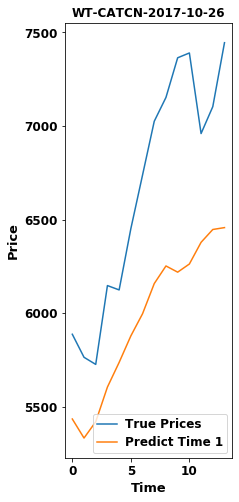

In [8]:
plot_df_one_model_date(one_model_result, -1 , 0)

### 下面这一部分用于定义图的大小， 先将曲线分为5类， 化成5*3的图；
### 暂时取为： 每列图为一种类型的趋势；
### 对上面的画图程序重新修改。

In [9]:
flat =    ['2017-06-15', '2017-08-13', '2018-09-21']
rising =  ['2017-10-26', '2017-11-24', '2018-04-11']
falling = ['2018-03-05', '2018-01-07', '2018-08-01']
convex =  ['2017-10-30', '2018-04-29', '2018-07-22']
concave = ['2017-12-27', '2018-02-02', '2018-03-10']

flat =    ['2017-06-15']
rising =  ['2017-10-26']
falling = ['2018-01-07']
convex =  ['2017-10-30']
concave = ['2017-12-27']

In [10]:
test_date = [flat, rising, falling, convex, concave]
test_date
test_date = np.array(test_date)
test_date = np.transpose(test_date)

In [19]:
# 重新定义画图曲线
def new_plot_df_one_model_date(df, index, column, is_plot_price):
    '''用于画出由get_alg_curve计算出的df任何方格中的曲线'''
    a = eval(df.iloc[index, column])
    if not is_plot_price:
        plt.plot(a['test_y'][0], label='True Prices', linewidth=3, color='red')
        is_plot_price = 1

    # 这里可以选择画第几条曲线：
    # 暂时设置为预测出的第一条
    for i in range(2,3):
        j = i+1
        if "WT-CATCN" in df.index[index]:
            plt.plot(a['test_predict'][i], label='{}'.format(df.index[index]), linewidth=3)
        else:
            plt.plot(a['test_predict'][i], label='{}'.format(df.index[index]))
        # 设置y的刻度范围， 采用a['test_y'][0] + a['test_predict'][i]取最大和最小值
        test = a['test_y'][0] + a['test_predict'][i]
        plt.xticks(fontsize=10,fontweight='bold')  #默认字体大小为10
        plt.yticks(fontsize=10,fontweight='bold')
        plt.xlabel('Time', fontsize=12,fontweight='bold')
        plt.ylabel('Price', fontsize=12,fontweight='bold')
        plt.title('{}'.format(df.columns[column]),fontsize=10,fontweight='bold')
        # plt.legend()
        plt.legend(loc=0, numpoints=1)
        leg = plt.gca().get_legend()
        ltext  = leg.get_texts()
        plt.setp(ltext, fontsize=10,fontweight='bold')  #设置图例字体的大小和粗细
    return is_plot_price, test

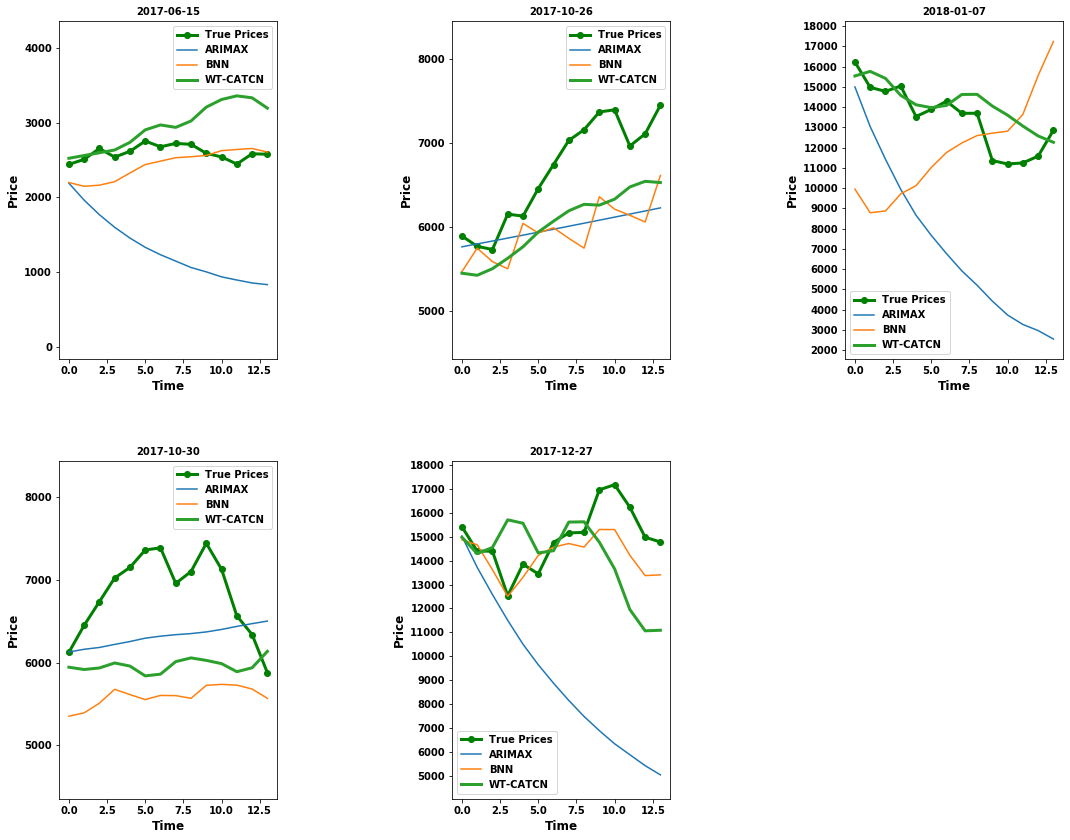

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import MultipleLocator
pdf = PdfPages('curve.pdf')

plt.figure(figsize=(18, 12))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框
# plt.subplots_adjust(hspace=0.1, wspace=0.3)
fig_num = 0 # 用于定位画图的位置
one_model_result_index = one_model_result.index.to_list()
idxs = ['ARIMAX', 'BNN', 'WT-CATCN']
cols = one_model_result.columns.to_list()
test_date = np.array(test_date)
# 第一个维度为曲线类型
for curve_type in range(len(test_date)):
    dates = test_date[curve_type]
    # 第二个维度为所要画图的日期
    for date in dates:
        # 第三个维度画出所有不同模型的价格曲线
        fig_num += 1
        plt.subplot(2, 3, fig_num)
        is_plot_price = 0
        test = []
        for idx in idxs:
            i = one_model_result_index.index(idx)
            j = cols.index(date)
            is_plot_price, test_sub = new_plot_df_one_model_date(one_model_result, i, j, is_plot_price)
            test = test + test_sub
        y_major_locator = MultipleLocator(1000)
        ax = plt.gca()
        ax.yaxis.set_major_locator(y_major_locator)
        test = np.array(test)
        plt.ylim(test.min()-1000, test.max()+1000)
# plt.tight_layout()
plt.subplots_adjust(bottom=0.05, top=0.95, wspace=0.8, hspace=0.3)
# plt.show()
plt.savefig("curve.svg")

# pdf.savefig()
# plt.close()
# pdf.close() # must